In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np

In [16]:
class SimpleNeuron:
    def __init__(self, w_init, b_init):
     
        self.w = w_init
        self.b = b_init
       
        self.w_history = []
        self.b_history = []
        self.error_history = []

   
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-(self.w * x + self.b)))
   
    def compute_error(self, X, Y):
        total_error = 0
        for x, y in zip(X, Y):
            pred = self.sigmoid(x)
            total_error += 0.5 * (pred - y) ** 2
        return total_error


    def grad_w(self, x, y):
        pred = self.sigmoid(x)
        return (pred - y) * pred * (1 - pred) * x

 
    def grad_b(self, x, y):
        pred = self.sigmoid(x)
        return (pred - y) * pred * (1 - pred)

    def fit(self, X, Y, epochs=100, learning_rate=0.01):

        for i in range(epochs):
            dw_total = 0
            db_total = 0
            
           
            for x, y in zip(X, Y):
                dw_total += self.grad_w(x, y)
                db_total += self.grad_b(x, y)
              
            self.w -= learning_rate * dw_total / len(X)
            self.b -= learning_rate * db_total / len(X)
            
      
            self.w_history.append(self.w)
            self.b_history.append(self.b)
            self.error_history.append(self.compute_error(X, Y))

   
    def predict(self, X):
        preds = []
        for x in X:
            preds.append(self.sigmoid(x))
        return np.array(preds)

    def plot_progress(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.error_history, label='Error', color='red')
        plt.plot(self.w_history, label='Weight', color='blue')
        plt.plot(self.b_history, label='Bias', color='green')
        plt.xlabel('Epochs')
        plt.ylabel('Values')
        plt.legend()
        plt.show()


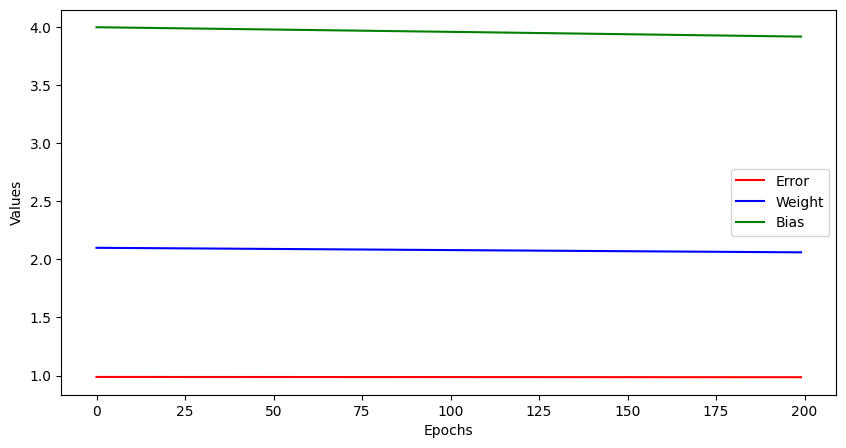

Predictions: [0.99998536 0.99043618 0.99997283 0.44948212 0.99909809 0.94727316]


In [ ]:
X = np.array([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.array([0.5, 0.5, 0.5, 0.5, 0.1, 0.3])


neuron = SimpleNeuron(w_init=2.1, b_init=4.0)

neuron.fit(X, Y, epochs=200, learning_rate=0.1)



neuron.plot_progress()


preds = neuron.predict(X)
print("Predictions:", preds)
